In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Simulate data from ARMA

In [16]:
arr1= np.array([1, 0.33])
ma1 = np.array([1, 0.9])

simulated_ARMA_data = ArmaProcess(arr1, ma1).generate_sample(nsample=10000)

In [17]:
simulated_ARMA_data

array([ 0.34050609,  0.22058295, -1.9396167 , ..., -1.03339355,
        0.1529619 ,  1.68294119])

## Show simulated data

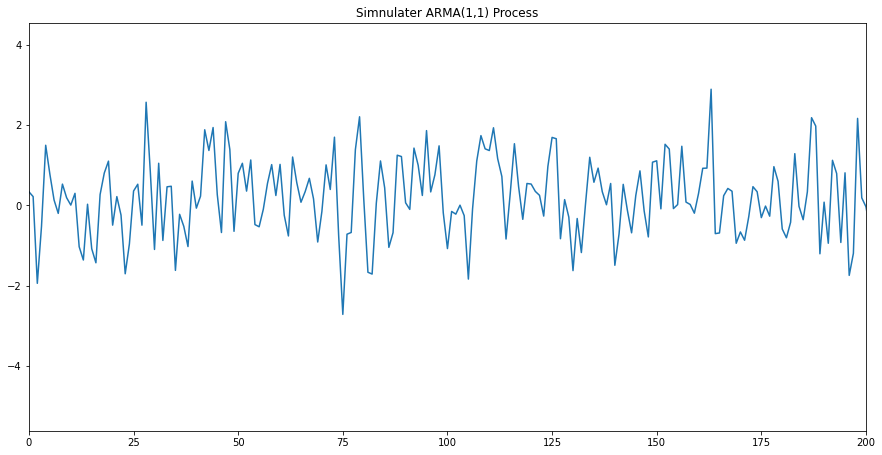

In [18]:
plt.figure(figsize=[15, 7.5])
plt.plot(simulated_ARMA_data)
plt.title('Simnulater ARMA(1,1) Process')
plt.xlim([0,200])
plt.show()

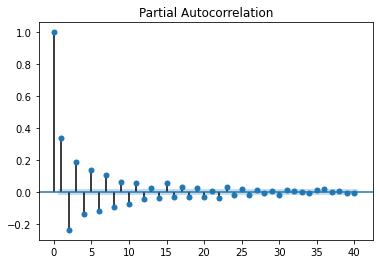

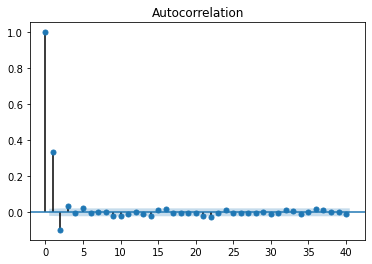

In [22]:
plot_pacf(simulated_ARMA_data);
plot_acf(simulated_ARMA_data);

## simulate an ARMA(2,2) process

In [23]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0.9, 0.3])

simulated_ARMA2_data = ArmaProcess(ar2, ma2).generate_sample(nsample=10000)

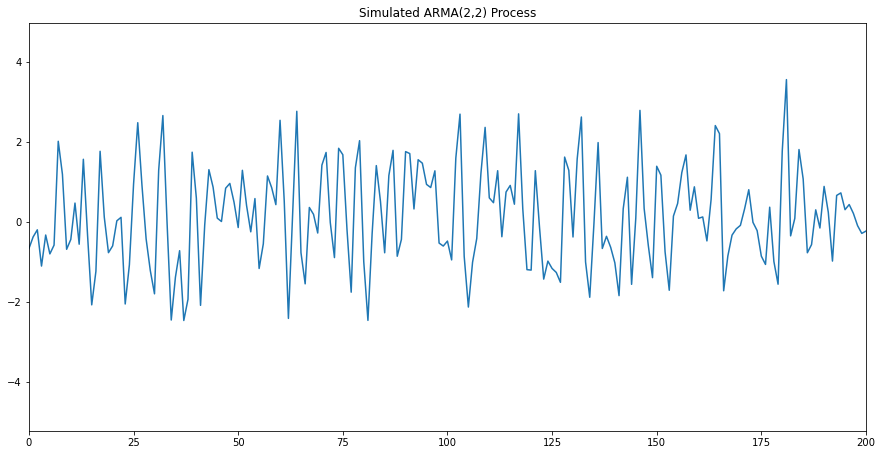

In [24]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(simulated_ARMA2_data)
plt.title("Simulated ARMA(2,2) Process")
plt.xlim([0, 200])
plt.show()

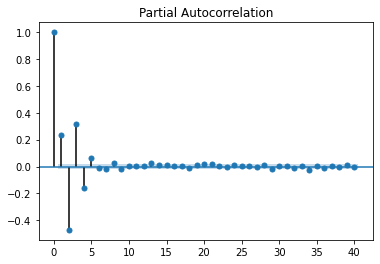

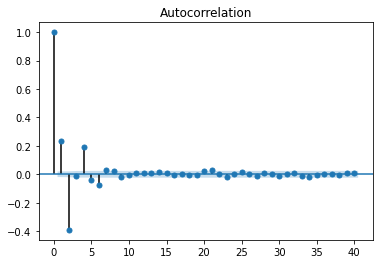

In [25]:
plot_pacf(simulated_ARMA2_data);
plot_acf(simulated_ARMA2_data);

## Finding best model

In [73]:
from statsmodels.tsa.stattools import adfuller


In [74]:
result = adfuller(simulated_ARMA2_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -33.844368
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


ARMA(0,0)
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(0, 0)   Log Likelihood              -16533.005
Method:                           css   S.D. of innovations              1.264
Date:                Wed, 07 Oct 2020   AIC                          33070.010
Time:                        21:36:18   BIC                          33084.431
Sample:                             0   HQIC                         33074.891
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0207      0.013      1.638      0.101      -0.004       0.045




ARMA(0,1)
                              ARMA Model Results                              
Dep. Variable:              

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(2, 1)   Log Likelihood              -14361.602
Method:                       css-mle   S.D. of innovations              1.017
Date:                Wed, 07 Oct 2020   AIC                          28733.205
Time:                        21:36:22   BIC                          28769.256
Sample:                             0   HQIC                         28745.408
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0207      0.011      1.871      0.061      -0.001       0.042
ar.L1.y       -0.0430      0.012     -3.506      0.000      -0.067      -0.019
ar.L2.y       -0.4023      0.010    -39.413      0.0

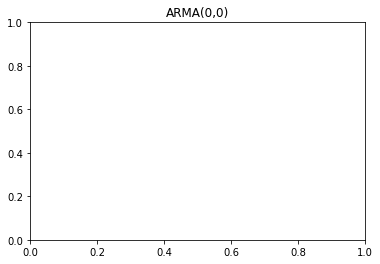

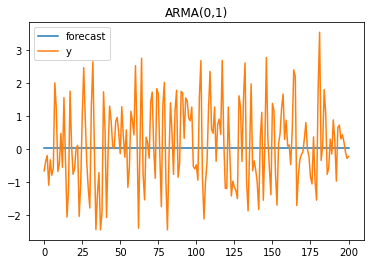

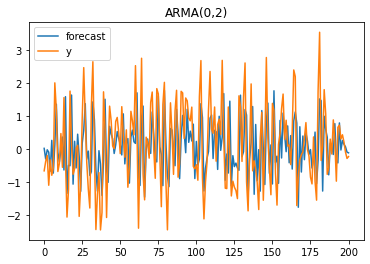

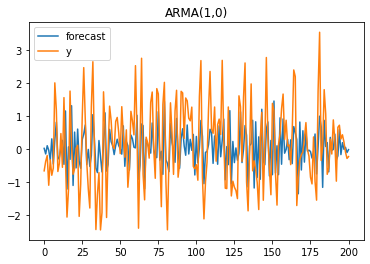

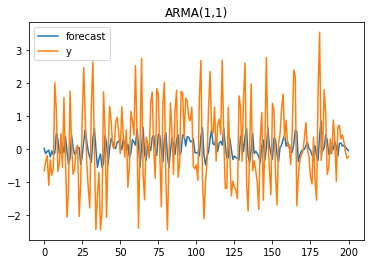

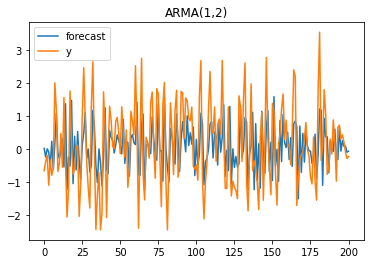

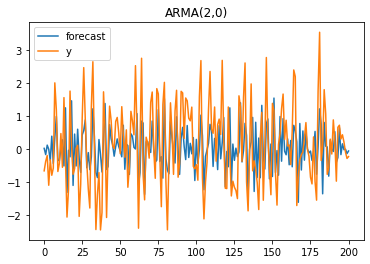

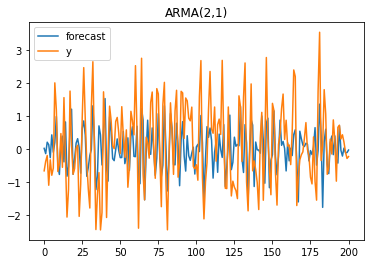

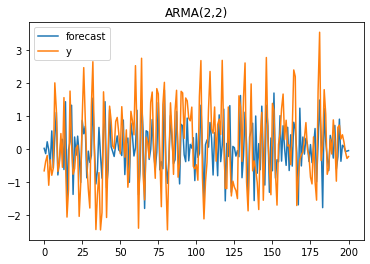

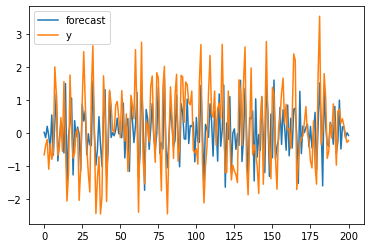

In [76]:
ar_coef = np.array([x for x in range(0,4)])
ma_coef = np.array([x for x in range(0,4)])

models_fited = {}

for ar_1 in ar_coef:
    for ma_1 in ma_coef:
        
        print(f'ARMA({ar_1},{ma_1})')
        model = ARMA(simulated_ARMA2_data, order=(ar_1,ma_1))
        fited = model.fit()
        
        models_fited[f'ARMA({ar_1},{ma_1})'] = fited
        
        plt.title(f'ARMA({ar_1},{ma_1})')
        fited.plot_predict(end=200)
        
        print(fited.summary())
        print('\n\n\n')

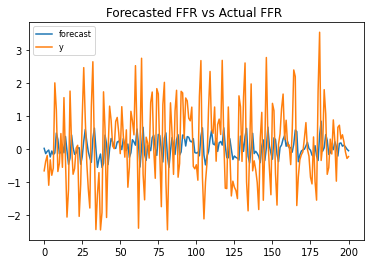

In [37]:
ffr_pred.plot_predict(start=0, end=200)
plt.legend(fontsize=8)
plt.title('Frorecastiong')
plt.savefig('ffr forecast')
plt.show()

In [38]:
from sklearn import metrics

In [39]:
acc_1_pred = ffr_pred.predict()

## ARMA (2,2) model

In [50]:
model_arma_2_2 = ARMA(simulated_ARMA2_data, order=(2,2))

In [51]:
arma_fit_2_2 = model_arma_2_2.fit()

In [52]:
print(arma_fit_2_2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(2, 2)   Log Likelihood              -14308.190
Method:                       css-mle   S.D. of innovations              1.012
Date:                Wed, 07 Oct 2020   AIC                          28628.380
Time:                        21:13:57   BIC                          28671.642
Sample:                             0   HQIC                         28643.023
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0207      0.012      1.724      0.085      -0.003       0.044
ar.L1.y       -0.2843      0.025    -11.175      0.000      -0.334      -0.234
ar.L2.y       -0.4871      0.012    -41.772      0.0

In [62]:
arma_fit_2_2.plot_predict(start=0, end=200, figsize=(15, 7.5));

TypeError: plot_predict() got an unexpected keyword argument 'figsize'

In [26]:
from statsmodels.stats.stattools import  durbin_watson

In [27]:
durbin_watson(y)

0.6353953697332477